# Assignment 4 #
### Due: Friday, October 27th to be submitted via Canvas by 11:59 pm ###
### Total points: **80** ###

## Q1. (10 points) Bayes Optimal Classifier

Consider a one-dimensional dataset  $(X)$ that consists of data from three different classes - $\{c_1, c_2, c_3\}$.  Data from class $c_1$ are distributed according to $Uniform[-1,1]$, those from $c_2$ are distributed according to $Uniform[-2,2]$ and those from $c_3$ are distributed according to $Uniform[-4,4]$.
The priors for the three classes are:
$\mathbb{P} (c_1) = \frac{1}{2}$,   $\mathbb{P} (c_2) = \frac{1}{3}$,
  $\mathbb{P} (c_3) = \frac{1}{6}$.

Now, we want to build a 3-class classifier based on bayes optimal decision theory to predict the most likely label for any given data point.

a. (2 points) Write down the class-conditional data distributions for each of the classes defined above.

b. (4 points). Derive the Bayes optimal decision boundaries for this problem.

c. (4 points) What is the Bayes Error rate for this classifier?

#### ANSWERs for Q1 and Q2 can be found in the link below

https://github.com/axj65/ece381/blob/main/HW4_Q1-Q2.pdf

## Q2. (10 points) Multi-class Logistic Regression Derivation

To use Logistic Regression for multi-class setting with K classes - $\{1,2, ... K\}$, we need to learn $K-1$ $d$-dimensional weight vectors, $\{w_1, w_2, ..., w_{K-1}\}$ which then provide the posterior probabilities for each class in the following way -

\begin{align}
  \mathbb{P} (y = k|x) =
  \begin{cases}
                                   \dfrac{exp(w_k^Tx)}{1 + \sum_{i=1}^{K-1}exp(w_i^Tx)} & \text{for }k \in [1,K-1] \\
                                   \dfrac{1}{1 + \sum_{i=1}^{K-1}exp(w_i^Tx)} & \text{for } k = K
  \end{cases}
\end{align}

Suppose you are given a dataset $(X,Y)$ consisting of $N$ data-points where each $x$ is in $d$-dimensions, and $y \in [1, 2, ... K]$.

a. (3 points) Write down the total conditional likelihood of observing the corresponding y's for the given x's in the dataset, under the model specified above.

b. (7 points) Derive the update equation for any $w_i$ that can be used to learn $w_i$ via gradient descent.

#### ANSWERs for Q1 and Q2 can be found in the link below

https://github.com/axj65/ece381/blob/main/HW4_Q1-Q2.pdf

## Q3. (25 points) Introduction to PyTorch

In this exercise, you will be introduced to PyTorch through an example on SVHN (Street View House Numbers) classification.
If you want to run it locally, please check out this [link](https://pytorch.org/get-started/locally/) to install PyTorch. Otherwise, you can just use Google Colab.

Here is a [tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html) for you to quickly to get familiar with PyTorch and finish the problems below.



In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sn
import pandas as pd
from torchvision import datasets, transforms


a. (5 points) Load the SVHN dataset from torchvision.datasets with the transform specified below and show the first 5 images of the training set.

Tutorial reference:
*    [Dataset and dataloaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)



In [2]:
transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.4376821, 0.4437697, 0.47280442), (0.19803012, 0.20101562, 0.19703614))
        ])

# Load SVHN training and testing datasets from torchvision.datasets
### START CODE ###
train_dataset = datasets.SVHN(root='data', split='train', transform=transform, download=True)
test_dataset = datasets.SVHN(root='data', split='test', transform=transform, download=True)
### END CODE ###

Using downloaded and verified file: data\train_32x32.mat
Using downloaded and verified file: data\test_32x32.mat


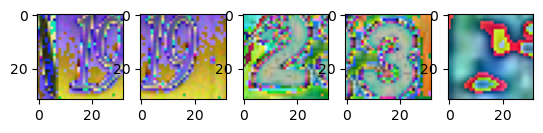

In [3]:
f, axarr = plt.subplots(1,5)
transform = torchvision.transforms.ToPILImage()
axarr[0].imshow(transform(train_dataset[0][0]))
axarr[1].imshow(transform(train_dataset[1][0]))
axarr[2].imshow(transform(train_dataset[2][0]))
axarr[3].imshow(transform(train_dataset[3][0]))
axarr[4].imshow(transform(train_dataset[4][0]))

b. (5 points) Split out 20% of the training set as the validation set and construct three data loaders: train_dataloader, val_dataloader, and test_dataloader. For the data loaders, set the batch sizes to 256 and set the train_dataloader to shuffled, which randomizes the mini-batch samples.

Tutorial reference:
*    [Dataset and dataloaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)







In [4]:
train_num = int(len(train_dataset) * 0.8)
val_num = len(train_dataset) - train_num

# Randomly split the training dataset into training dataset and validation dataset
### START CODE ###
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_num, val_num])
### END CODE ###

# Create data loaders
### START CODE ###
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=256, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=256, shuffle=False)
### END CODE ###


c. (5 points) Build a multiple layer perceptron with the following sequential structure:


*   Fully connected layer mapping from 32 * 32 * 3 dimensions to 50 dimensions
*   ReLU activation
*   Fully connected layer mapping from 50 dimensions to 50 dimensions
*   ReLU activation
*   Fully connected layer mapping from 50 dimensions to 10 dimensions

Then, create an model with the MLP class and an Adam optimizer that will be optimizing the MLP's parameters. Set the initial learning rate to be 0.001.

Tutorial reference:
*   [Build the neural network](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html)




In [5]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [6]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # Create fully connected layers (nn.Linear)
        ### START CODE ###
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(32*32*3, 50),
            nn.ReLU(),
            nn.Linear(50, 50),
            nn.ReLU(),
            nn.Linear(50, 10),
        )

        ### END CODE ###

    def forward(self, x):
        # Flatten the input x and pass it through the neural network
        #x = x.view(-1, 32*32*3)
        ### START CODE ###
        x = self.flatten(x)
        x = self.linear_relu_stack(x)
        ### END CODE ###
        return x


In [7]:
model = MLP()

# Create the optimizer
### START CODE ###
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
### END CODE ###

d. (5 points) Write training and evaluation subroutines per epoch (one full pass of the dataset). Then, train the model for 20 epochs using these subroutines.

Tutorial reference:
*   [Optimizing model parameters](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html)



In [8]:
def train(model, loader, optimizer):
    model.train()
    total_loss = 0
    total_num = 0
    for data, target in tqdm(loader):
        out = model(data)
        
        # Calculate loss based on model output and target
        ### START CODE ###
        loss = torch.nn.functional.cross_entropy(out, target)
        ### END CODE ###

        # Use the optimizer to perform backpropagation
        ### START CODE ###
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        ### END CODE ###

        batch_size = len(target)
        total_loss += loss.item() * batch_size
        total_num += batch_size
    avg_loss = total_loss / total_num
    return avg_loss

@torch.no_grad()
def eval(model, loader):
    model.eval()
    total_loss = 0
    total_correct = 0
    total_num = 0
    for data, target in tqdm(loader):
        out = model(data)
        # Calculate loss based on model output and target
        ### START CODE ###
        loss = torch.nn.functional.cross_entropy(out, target)
        ### END CODE ###

        # Get model's prediction
        ### START CODE ###
        pred = out.argmax(dim=1)
        ### END CODE ###

        # Count number of correct predictions
        ### START CODE ###
        correct = pred.eq(target).sum().item()
        ### END CODE ###

        total_correct += correct
        batch_size = len(target)
        total_loss += loss.item() * batch_size
        total_num += batch_size
    avg_loss = total_loss / total_num
    acc = total_correct / total_num
    return avg_loss, acc


In [9]:
epochs = 20
for e in range(1, epochs + 1):
    train_loss = train(model, train_loader, optimizer)
    val_loss, val_acc = eval(model, val_loader)
    print(f"Epoch: {e} Train Loss: {train_loss} Val Loss: {val_loss} Val Acc: {val_acc}")

100%|██████████| 58/58 [00:01<00:00, 43.34it/s]


Epoch: 1 Train Loss: 1.5076251126364955 Val Loss: 1.0572660550405963 Val Acc: 0.685913185913186


100%|██████████| 58/58 [00:01<00:00, 43.56it/s]


Epoch: 2 Train Loss: 0.9541235476861929 Val Loss: 0.9162809128420228 Val Acc: 0.7237919737919738


100%|██████████| 58/58 [00:01<00:00, 41.56it/s]


Epoch: 3 Train Loss: 0.8395040882171781 Val Loss: 0.8445194628666308 Val Acc: 0.7482254982254982


100%|██████████| 58/58 [00:01<00:00, 42.91it/s]


Epoch: 4 Train Loss: 0.7693937079571445 Val Loss: 0.8010009398168793 Val Acc: 0.7582582582582582


100%|██████████| 58/58 [00:01<00:00, 42.83it/s]


Epoch: 5 Train Loss: 0.7269271335537936 Val Loss: 0.7494837475252581 Val Acc: 0.7794157794157794


100%|██████████| 58/58 [00:01<00:00, 41.84it/s]


Epoch: 6 Train Loss: 0.6878116982858464 Val Loss: 0.7620164007070511 Val Acc: 0.7716352716352717


100%|██████████| 58/58 [00:01<00:00, 43.13it/s]


Epoch: 7 Train Loss: 0.6642133825417824 Val Loss: 0.7320443437199042 Val Acc: 0.788970788970789


100%|██████████| 58/58 [00:01<00:00, 30.17it/s]


Epoch: 8 Train Loss: 0.6379573787858529 Val Loss: 0.7921139413367325 Val Acc: 0.7684957684957685


100%|██████████| 58/58 [00:01<00:00, 38.11it/s]


Epoch: 9 Train Loss: 0.6211985326354368 Val Loss: 0.6924330930940251 Val Acc: 0.7994812994812995


100%|██████████| 58/58 [00:01<00:00, 37.40it/s]


Epoch: 10 Train Loss: 0.6011175343459625 Val Loss: 0.7060109589258049 Val Acc: 0.7958640458640459


100%|██████████| 58/58 [00:01<00:00, 39.98it/s]


Epoch: 11 Train Loss: 0.5924014010218648 Val Loss: 0.6948688954660028 Val Acc: 0.8007098007098007


100%|██████████| 58/58 [00:01<00:00, 32.25it/s]


Epoch: 12 Train Loss: 0.5774996252304437 Val Loss: 0.6857608935561559 Val Acc: 0.8037128037128037


100%|██████████| 58/58 [00:01<00:00, 40.97it/s]


Epoch: 13 Train Loss: 0.5671822318327161 Val Loss: 0.686916527121958 Val Acc: 0.8024843024843025


100%|██████████| 58/58 [00:01<00:00, 36.78it/s]


Epoch: 14 Train Loss: 0.5581193725481628 Val Loss: 0.681632893140154 Val Acc: 0.8065793065793065


100%|██████████| 58/58 [00:01<00:00, 37.81it/s]


Epoch: 15 Train Loss: 0.5466816315705048 Val Loss: 0.6594860065090764 Val Acc: 0.8125853125853126


100%|██████████| 58/58 [00:01<00:00, 41.53it/s]


Epoch: 16 Train Loss: 0.5415684541076659 Val Loss: 0.6637017864722747 Val Acc: 0.8126535626535627


100%|██████████| 58/58 [00:01<00:00, 42.31it/s]


Epoch: 17 Train Loss: 0.5297178037713162 Val Loss: 0.6645107513205653 Val Acc: 0.8095140595140595


100%|██████████| 58/58 [00:01<00:00, 43.10it/s]


Epoch: 18 Train Loss: 0.5218019428960843 Val Loss: 0.6570825285674639 Val Acc: 0.814018564018564


100%|██████████| 58/58 [00:01<00:00, 43.99it/s]


Epoch: 19 Train Loss: 0.5122359344835381 Val Loss: 0.6880036163063216 Val Acc: 0.8082173082173082


100%|██████████| 58/58 [00:01<00:00, 41.86it/s]

Epoch: 20 Train Loss: 0.5146747363985689 Val Loss: 0.6510293864989066 Val Acc: 0.819000819000819


e. (5 points) Evaluate your model's accuracy and confusion matrix on the test set. Print the test accuracy and plot the confusion matrix.

100%|██████████| 102/102 [00:02<00:00, 41.67it/s]


Test accuracy: 0.7917947141979103


<Axes: >

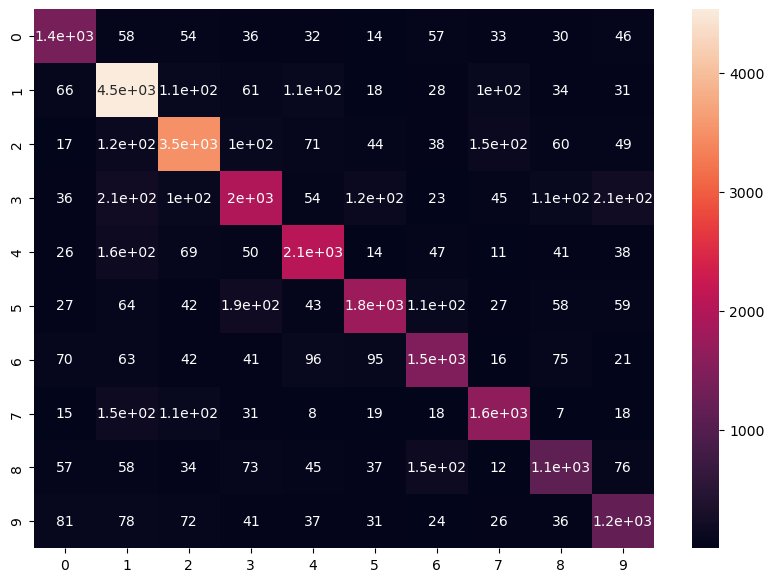

In [10]:
model.eval()
total_correct = 0
total_num = 0
all_y_true = []
all_y_pred = []
with torch.no_grad():
    for data, target in tqdm(test_loader):
        out = model(data)
        
        # Get model's prediction
        ### START CODE ###
        pred = out.argmax(dim=1)
        ### END CODE ###

        # Get number of correct predictions
        ### START CODE ###
        correct = pred.eq(target).sum().item()
        ### END CODE ###

        total_correct += correct
        batch_size = len(target)
        total_num += batch_size

        # Collect target into the all_y_true list and pred into the all_y_pred list for confusion matrix
        ### START CODE ###
        all_y_true.append(target)
        all_y_pred.append(pred)
        ### END CODE ###

test_acc = total_correct / total_num
print(f"Test accuracy: {test_acc}")

# Obtain confusion matrix
### START CODE ###
all_y_true = torch.cat(all_y_true)
all_y_pred = torch.cat(all_y_pred)
cm = confusion_matrix(all_y_true, all_y_pred)
### END CODE ###

df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                         columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

## Q4. (10 points) Bayesian Belief Networks

#### PART A

a) (3 points) Consider two BNNs given below. Suppose you installed two different anti-virus systems which use different algorithms for detection to efficiently detect all infections that can affect your system. Which of the following two BBNs below capture the independence assumptions of this setting correctly?

In [ ]:
#import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
#from matplotlib import rcParams

#%matplotlib inline
#img_A = mpimg.imread('hwq.drawio (3).png')
#img_B = mpimg.imread('hwq.drawio (4).png')

#fig, ax = plt.subplots(1,2)
#fig.patch.set_visible(False)
#ax[0].axis('off')
#ax[1].axis('off')
#ax[0].imshow(img_A)
#ax[1].imshow(img_B)

In [11]:
#import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
#from matplotlib import rcParams

#%matplotlib inline
#img_A = mpimg.imread('data/hw4_q4_bbn_image.png')
#plt.imshow(img_A)


#### Part A Answer
The image on the left captures the independence assumptions correcly

#### PART B

b) (7 points) From the first Bayesian network, compute $\mathbb{P}$(AV2 detection = T| AV1 detection = T , Virus infection = T). Use the following probability tables for the computation.

P(AV1 detection = T) = 0.1 

P(AV2 detection = T) = 0.2 

P(Virus infection = T | AV1 detection = T, AV2 detection = T) = 0.8 

P(Virus infection = T | AV1 detection = T, AV2 detection = F) = 0.7 

P(Virus infection = T | AV1 detection = F, AV2 detection = T) = 0.6 

P(Virus infection = T | AV1 detection = F, AV2 detection = F) = 0.5 

#### Part B answer

P(AV2=T | AV1=T, V=T) == P(V=T| AV1=T, AV2=T) * P(AV2=T | AV1=T) / P(V=T | AV1=T)

Assuming AV1 and AV2 are independent means P(AV2=T | AV1=T) = P(AV2=T)

Using law of total probability, P(V=T|AV1=T) = 0.8*0.2 + 0.7*(1-0.2) = 072

So

P(AV2=T | AV1=T, V=T)== 0.8 * 0.2 / 0.72

P(AV2=T | AV1=T, V=T) = 0.222

## Q5. (25 points) Classification using Sklearn and Model Evaluation

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
#from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
#uploaded = files.upload()

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

df = pd.read_csv('customer_churn_telcom.csv', index_col = [0])

In [13]:
#lets print the first five rows
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


## [5 points] Data Preprocessing and Splitting

In [15]:
# Replacing values of 'no internet service' and 'no phone service' with the value  'No'
## CODE HERE ##
df.replace('No internet service','No', inplace=True)
df.replace('No phone service','No', inplace=True)

(a) **[1 pt]** Convert all 'Yes' values to 1 and 'No' values to 0 <br>
(b) **[1 pt]** Convert all  'Female' values to 1 and 'Male' values to 0

In [16]:
# Changing values to 0/1

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

## CODE HERE ##
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0}, inplace=True)

df['gender'].replace({'Female': 1,'Male': 0}, inplace=True)

(c) **[1 pt]** Perform one-hot encoding on the folowing columns: 'InternetService', 'Contract', 'PaymentMethod'

In [17]:
# One hot encoding for categorical columns
# Name your final dataframe df 2

## CODE HERE ##
df2 = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [18]:
# Scaling
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

d) **[2 pt]** Split the dataset into training and test using a 80-20 split with a random state of 15. Perform stratified sampling on the target variable while doing so. Split the training dataset further into training (80%) and validation sets (20%) with a random state of 15. Again perform stratified sampling on the target variable while doing so.

Note: The 'stratify' parameter can be used for this in the train_test_split function.

In [19]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [20]:
# Train test split
from sklearn.model_selection import train_test_split


X = df2.drop('Churn', axis='columns')
y = df2['Churn']

# Write code to make train and test splits
## START CODE ##
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
## END CODE ##

In [21]:
# Write code to make train and validation splits
## START CODE ##
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=15, stratify=y_train)
## END CODE ##

In [22]:
# With samples corresponding to the positive class being very low, we can clearly see the imbalance in our data
print('Churn occurences in the training set \n', y_train.value_counts())
print('\n')
print('Churn occurences throughout the data \n', y.value_counts())

Churn occurences in the training set 
 Churn
0    3304
1    1196
Name: count, dtype: int64


Churn occurences throughout the data 
 Churn
0    5163
1    1869
Name: count, dtype: int64


## [20 points] Decision Trees, Logistic Regression, and MLP

Use the example provided [here](https://scikit-learn.org/stable/modules/tree.html) to get an idea of how to use sklearn's decision tree classifier.

Go through the documentation [here](https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.LogisticRegression.html) to understand how to use sklearn's logistic regression model.

Go through the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) to understand how to use sklearn's MLP Model.



Helpful resources for this question can be found here -
1. [sklearn.tree.DecisionTreeClassifier.score](https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/base.py#L625)
2.  [sklearn.linear_model.LogisticRegression.score](https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/base.py#L625)
3. [sklearn.neutral_network.MLPClassifier.score](https://github.com/scikit-learn/scikit-learn/blob/36958fb24/sklearn/base.py#L640)
4. [sklearn.metrics.plot_roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html)
5. [sklearn.metrics_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

(a) **[12 pts]** Train the three classifiers on the dataset and print confusion matrix on both - the validation data as well as the test data for all the three models. <br>

In [23]:
# Decision Tree Classifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import tree

## CODE HERE ##

dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_val = dt.predict(X_val)
y_pred_test = dt.predict(X_test)
print('Validation Set')
print('Confusion Matrix: \n', confusion_matrix(y_val, y_pred_val))
print('Test Set')
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_test))




Validation Set
Confusion Matrix: 
 [[668 158]
 [153 146]]
Test Set
Confusion Matrix: 
 [[845 188]
 [194 180]]


In [24]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

## CODE HERE ##
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_val = logreg.predict(X_val)
y_pred_test = logreg.predict(X_test)
print('Validation Set')
print('Confusion Matrix: \n', confusion_matrix(y_val, y_pred_val))
print('Test Set')
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_test))

Validation Set
Confusion Matrix: 
 [[734  92]
 [143 156]]
Test Set
Confusion Matrix: 
 [[929 104]
 [170 204]]


In [25]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier

## CODE HERE ##
mlp = MLPClassifier(activation='relu', max_iter=1000)
mlp.fit(X_train, y_train)
y_pred_val = mlp.predict(X_val)
y_pred_test = mlp.predict(X_test)
print('Validation Set')
print('Confusion Matrix: \n', confusion_matrix(y_val, y_pred_val))
print('Test Set')
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_test))


Validation Set
Confusion Matrix: 
 [[687 139]
 [155 144]]
Test Set
Confusion Matrix: 
 [[879 154]
 [197 177]]


(b) **[4 pts]** Plot the ROC Curves for all the three classifiers in a single graph and display the AUC-ROC scores for all the classifiers in this plot as well. Use both the validation and the test data to plot these curves as well as to calculate the AUC-ROC scores. Use one graph for validation data and one graph for test data (all models for validation data in one graph and all models for test data in one graph - and use this scheme for plotting in all subsequent plotting questions).

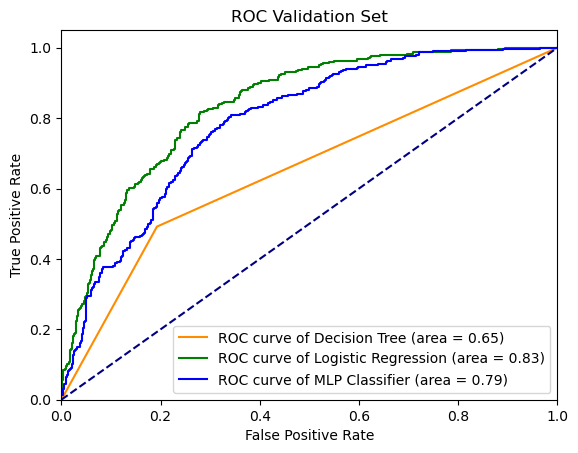

In [27]:
# Plot ROC curves

from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn import datasets, metrics, model_selection
import matplotlib.pyplot as plt

# Getting probability scores for each model using the validation set
y_scores_dt = dt.predict_proba(X_val)[:, 1]
y_scores_lr = logreg.predict_proba(X_val)[:, 1]
y_scores_mlp = mlp.predict_proba(X_val)[:, 1]

# Calculating ROC curve and ROC AUC for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_val, y_scores_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Calculating ROC curve and ROC AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_val, y_scores_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Calculating ROC curve and ROC AUC for MLP Classifier
fpr_mlp, tpr_mlp, _ = roc_curve(y_val, y_scores_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Plotting ROC curves
plt.figure()

# Decision Tree ROC
plt.plot(fpr_dt, tpr_dt, color='darkorange',
         label=f'ROC curve of Decision Tree (area = {roc_auc_dt:0.2f})')

# Logistic Regression ROC
plt.plot(fpr_lr, tpr_lr, color='green',
         label=f'ROC curve of Logistic Regression (area = {roc_auc_lr:0.2f})')

# MLP Classifier ROC
plt.plot(fpr_mlp, tpr_mlp, color='blue',
         label=f'ROC curve of MLP Classifier (area = {roc_auc_mlp:0.2f})')

# Random Guess line:
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Validation Set')
plt.legend(loc="lower right")
plt.show()


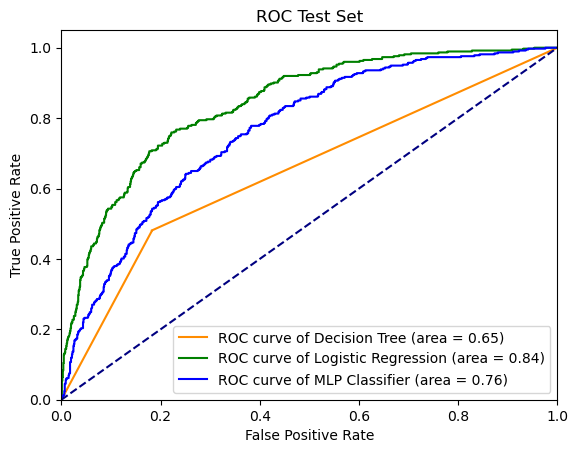

In [28]:

# Getting probability scores for each model
y_scores_dt = dt.predict_proba(X_test)[:, 1]
y_scores_lr = logreg.predict_proba(X_test)[:, 1]
y_scores_mlp = mlp.predict_proba(X_test)[:, 1]

# Calculating ROC curve and ROC AUC for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_scores_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Calculating ROC curve and ROC AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Calculating ROC curve and ROC AUC for MLP Classifier
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_scores_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Plotting ROC curves
plt.figure()

# Decision Tree ROC
plt.plot(fpr_dt, tpr_dt, color='darkorange',
         label=f'ROC curve of Decision Tree (area = {roc_auc_dt:0.2f})')

# Logistic Regression ROC
plt.plot(fpr_lr, tpr_lr, color='green',
         label=f'ROC curve of Logistic Regression (area = {roc_auc_lr:0.2f})')

# MLP Classifier ROC
plt.plot(fpr_mlp, tpr_mlp, color='blue',
         label=f'ROC curve of MLP Classifier (area = {roc_auc_mlp:0.2f})')

# Random Guess line:
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Test Set')
plt.legend(loc="lower right")
plt.show()


(c) **[4 pts]** Plot the Precision-Recall curves for all the three classifiers in a single graph. Use both the validation and the test data to plot these curves. Use one graph for validation data and one graph for test data.

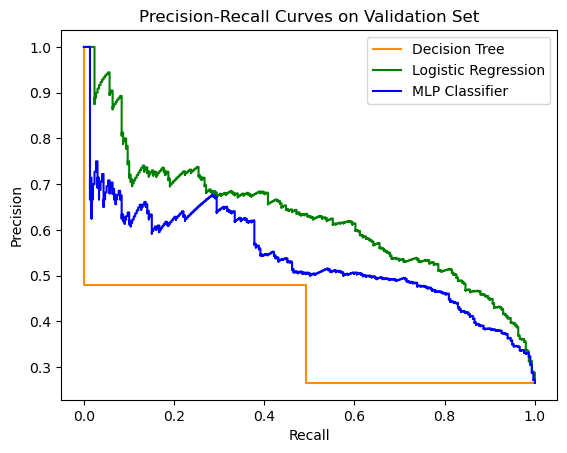

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Function to plot PR curve using PrecisionRecallDisplay
def plot_pr_curve_with_display(model, X, y, label, color, ax):
    y_scores = model.predict_proba(X)[:, 1]
    precision, recall, _ = precision_recall_curve(y, y_scores)
    disp = PrecisionRecallDisplay(precision=precision, recall=recall, estimator_name=label)
    disp.plot(ax=ax, color=color)
    return ax

# Creating a subplot to use the same axes for all plots
ax = plt.subplot()

# Decision Tree PR Curve
plot_pr_curve_with_display(dt, X_val, y_val, 'Decision Tree', 'darkorange', ax)

# Logistic Regression PR Curve
plot_pr_curve_with_display(logreg, X_val, y_val, 'Logistic Regression', 'green', ax)

# MLP Classifier PR Curve
plot_pr_curve_with_display(mlp, X_val, y_val, 'MLP Classifier', 'blue', ax)

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curves on Validation Set')
ax.legend()
plt.show()


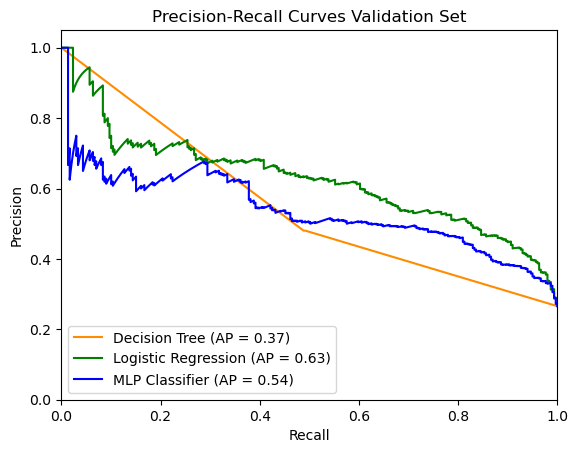

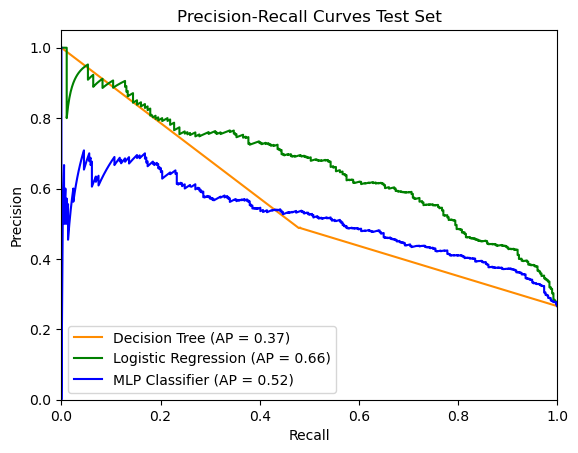

In [31]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Function to plot PR curve for each model
def plot_pr_curve(model, X, y, color, label):
    y_scores = model.predict_proba(X)[:, 1]
    precision, recall, _ = precision_recall_curve(y, y_scores)
    avg_precision = average_precision_score(y, y_scores)
    plt.plot(recall, precision, color=color,
             label=f'{label} (AP = {avg_precision:.2f})')
    return plt

# Plotting PR curves
plt.figure()
# Decision Tree PR Curve
plot_pr_curve(dt, X_val, y_val, 'darkorange', 'Decision Tree')
# Logistic Regression PR Curve
plot_pr_curve(logreg, X_val, y_val, 'green', 'Logistic Regression')
# MLP Classifier PR Curve
plot_pr_curve(mlp, X_val, y_val, 'blue', 'MLP Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curves Validation Set')
plt.legend(loc="lower left")
plt.show()


# Plotting PR curves
plt.figure()
# Decision Tree PR Curve
plot_pr_curve(dt, X_test, y_test, 'darkorange', 'Decision Tree')
# Logistic Regression PR Curve
plot_pr_curve(logreg, X_test, y_test, 'green', 'Logistic Regression')
# MLP Classifier PR Curve
plot_pr_curve(mlp, X_test, y_test, 'blue', 'MLP Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curves Test Set')
plt.legend(loc="lower left")
plt.show()
